In [104]:
from tqdm import tqdm 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score
import re
import pandas as pd
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ormeiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
df = pd.read_csv('/Users/ormeiri/Desktop/Work/sci-search/parser/data/combined_data_new.csv')
df

,term_id,langs,country,term,type,code_lang,hl,gl,Collection date,Result number,...,Is there reference to everyday life?,Is there reference to everyday life? פרופורציה,Are there local examples in the content? (e.g. relevant case study in a country or ethnic group that speaks the language of the content),Are there local examples in the content? (e.g. relevant case study in a country or ethnic group that speaks the language of the content)פרופורציה,Does the content present advantages and disadvantages or risks and benefits?,Does the content present advantages and disadvantages or risks and benefits? פרופורציה,ssi_mean,SSI mean פרופורציה Integrated,raw_html,extracted_text
0,70,Zulu,"Cape Town,Western Cape,South Africa",Isikhukhula,Socio-Scientific Issues,zu,zu,za,20.2.2023,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,"<html>\r\n<head>\r\n<META NAME=""robots"" CONTEN...",NaN
1,71,Zulu,"Cape Town,Western Cape,South Africa",Isomiso,Socio-Scientific Issues,zu,zu,za,20.2.2023,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,\n \n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html x...,\ndrought\n
2,71,Zulu,"Cape Town,Western Cape,South Africa",Isomiso,Socio-Scientific Issues,zu,zu,za,20.2.2023,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,"<!doctype html><html lang=""en""><head><script>v...",NaN
3,29,Zulu,"Cape Town,Western Cape,South Africa",Isisindo,Canonical Scientific Issues,zu,zu,za,20.2.2023,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,"<!DOCTYPE html><html style=""font-size: 10px;fo...",NaN
4,29,Zulu,"Cape Town,Western Cape,South Africa",Isisindo,Canonical Scientific Issues,zu,zu,za,20.2.2023,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,"<!DOCTYPE html><html style=""font-size: 10px;fo...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,56,Ukrainian,"Kyiv,Kyiv city,Ukraine",калорія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,4.0,...,2.0,1.0,1.0,0.5,2.0,1.0,0.833333,0.833333,"<!DOCTYPE html>\n<html lang=""uk"">\n<head> \n\...",Фітнес портал Калорійність продуктів — як її п...
4157,58,Ukrainian,"Kyiv,Kyiv city,Ukraine",відновлювальна енергія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,2.0,...,2.0,1.0,1.0,0.5,2.0,1.0,0.833333,0.833333,"<!DOCTYPE html><html lang=""uk""><head><meta cha...","Відновлювану енергію можна отримувати з води, ..."
4158,58,Ukrainian,"Kyiv,Kyiv city,Ukraine",відновлювальна енергія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,3.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.000000,1.000000,"<!DOCTYPE html><html style=""font-size: 10px;fo...",NaN
4159,12,Ukrainian,"Kyiv,Kyiv city,Ukraine",гриб,Canonical Scientific Issues,uk,uk,ua,22.12.2022,8.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.000000,NaN,"<!DOCTYPE html>\n<html xmlns=""http://www.w3.or...",У лісі поблизу Ворохти виявили гігантський біл...


In [82]:
def clean_text(text):
    text = str(text)
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

In [83]:
df['cleaned_text'] = df['extracted_text'].apply(clean_text)
X = df[df['cleaned_text'] != 'nan']
X

,term_id,langs,country,term,type,code_lang,hl,gl,Collection date,Result number,...,Is there reference to everyday life? פרופורציה,Are there local examples in the content? (e.g. relevant case study in a country or ethnic group that speaks the language of the content),Are there local examples in the content? (e.g. relevant case study in a country or ethnic group that speaks the language of the content)פרופורציה,Does the content present advantages and disadvantages or risks and benefits?,Does the content present advantages and disadvantages or risks and benefits? פרופורציה,ssi_mean,SSI mean פרופורציה Integrated,raw_html,extracted_text,cleaned_text
1,71,Zulu,"Cape Town,Western Cape,South Africa",Isomiso,Socio-Scientific Issues,zu,zu,za,20.2.2023,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,\n \n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html x...,\ndrought\n,\ndrought\n
5,35,Zulu,"Cape Town,Western Cape,South Africa",amaplanethi azungeza ilanga,Canonical Scientific Issues,zu,zu,za,20.2.2023,1.0,...,0.5,1.0,0.5,1.0,0.5,0.500000,0.500000,"<!DOCTYPE html><html lang=""zu"" dir=""ltr""><head...",Isikhala kusuka ku-A kuya ku-Z Ngaphandle kwe-...,Isikhala kusuka kuA kuya kuZ Ngaphandle kweMer...
6,43,Zulu,"Cape Town,Western Cape,South Africa",Ulibofuzo,Novel Science and Technology Issues,zu,zu,za,20.2.2023,2.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,"<!doctype html>\n <html lang=""zu"">\n <he...","Nkosikhona Cele | June 11, 2022 SITHOLAKALE ...",Nkosikhona Cele June 11 2022 SITHOLAKALE si...
8,54,Zulu,"Cape Town,Western Cape,South Africa",Ukuba nokudla,Socio-Scientific Issues,zu,zu,za,20.2.2023,3.0,...,1.0,0.0,0.0,0.0,0.0,0.333333,NaN,"\r\n\r\n<!DOCTYPE html PUBLIC ""-//W3C//DTD XHT...","I-College of Agriculture, Engineering and Scie...",ICollege of Agriculture Engineering and Scienc...
9,56,Zulu,"Cape Town,Western Cape,South Africa",Ikhalori,Socio-Scientific Issues,zu,zu,za,20.2.2023,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,"<!DOCTYPE html>\n<html ⚡ lang=""en-US"">\n<head>...","Omunye izitsha athandwa kakhulu, okuyinto, ka...",Omunye izitsha athandwa kakhulu okuyinto kany...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,56,Ukrainian,"Kyiv,Kyiv city,Ukraine",калорія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,3.0,...,1.0,2.0,1.0,2.0,1.0,1.000000,1.000000,"<!doctype html><html lang=""uk""><head><meta...","\nПрирода влаштувала нас так, що, навіть з`ївш...",\nПрирода влаштувала нас так що навіть зївши з...
4156,56,Ukrainian,"Kyiv,Kyiv city,Ukraine",калорія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,4.0,...,1.0,1.0,0.5,2.0,1.0,0.833333,0.833333,"<!DOCTYPE html>\n<html lang=""uk"">\n<head> \n\...",Фітнес портал Калорійність продуктів — як її п...,Фітнес портал Калорійність продуктів як її пр...
4157,58,Ukrainian,"Kyiv,Kyiv city,Ukraine",відновлювальна енергія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,2.0,...,1.0,1.0,0.5,2.0,1.0,0.833333,0.833333,"<!DOCTYPE html><html lang=""uk""><head><meta cha...","Відновлювану енергію можна отримувати з води, ...",Відновлювану енергію можна отримувати з води в...
4159,12,Ukrainian,"Kyiv,Kyiv city,Ukraine",гриб,Canonical Scientific Issues,uk,uk,ua,22.12.2022,8.0,...,1.0,2.0,1.0,2.0,1.0,1.000000,NaN,"<!DOCTYPE html>\n<html xmlns=""http://www.w3.or...",У лісі поблизу Ворохти виявили гігантський біл...,У лісі поблизу Ворохти виявили гігантський біл...


In [84]:
def normalize_text(text):
    # Regex to match dates in various formats
    date_patterns = [
        r'\b\d{1,2}[\/.-]\d{1,2}[\/.-]\d{2,4}\b',  # Numeric dates like 19/09/2024, 25.12.2012
        r'\b\d{4}[\/.-]\d{1,2}[\/.-]\d{1,2}\b',  # Numeric dates like 2024-09-19
        r'\b\d{1,2}\s+(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*\s+\d{4}\b',  # Dates like 15 Nov 2013, 1 January 2022
        r'\b(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},?\s+\d{4}\b',  # Dates like March 15, 2023 and March 15 2023
        r'\b\d{1,2}\s+(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{4}\b',  # Dates like 15 March 2023
    ]
    # Combine all date regex patterns into one
    date_regex = '|'.join(date_patterns)

    text = re.sub(date_regex, '<date>', text)  # Replace dates with <date>
    # URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '<url>', text)
    # Email addresses
    text = re.sub(r'\b[\w.-]+?@\w+?\.\w{2,4}\b', '<email>', text)
    # Money amounts
    text = re.sub(r'\$\d+(?:\.\d{2})?', '<money>', text)
    # Phone numbers
    text = re.sub(r'\b\d{3}-\d{4}\b', '<phone>', text)

    return text

In [85]:
X['cleaned_text'] = X['cleaned_text'].apply(normalize_text)
X

/var/folders/68/dmpmrx5n0ts80f_y59l1n8y00000gn/T/ipykernel_42479/3863618037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cleaned_text'] = X['cleaned_text'].apply(normalize_text)


,term_id,langs,country,term,type,code_lang,hl,gl,Collection date,Result number,...,Is there reference to everyday life? פרופורציה,Are there local examples in the content? (e.g. relevant case study in a country or ethnic group that speaks the language of the content),Are there local examples in the content? (e.g. relevant case study in a country or ethnic group that speaks the language of the content)פרופורציה,Does the content present advantages and disadvantages or risks and benefits?,Does the content present advantages and disadvantages or risks and benefits? פרופורציה,ssi_mean,SSI mean פרופורציה Integrated,raw_html,extracted_text,cleaned_text
1,71,Zulu,"Cape Town,Western Cape,South Africa",Isomiso,Socio-Scientific Issues,zu,zu,za,20.2.2023,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,\n \n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html x...,\ndrought\n,\ndrought\n
5,35,Zulu,"Cape Town,Western Cape,South Africa",amaplanethi azungeza ilanga,Canonical Scientific Issues,zu,zu,za,20.2.2023,1.0,...,0.5,1.0,0.5,1.0,0.5,0.500000,0.500000,"<!DOCTYPE html><html lang=""zu"" dir=""ltr""><head...",Isikhala kusuka ku-A kuya ku-Z Ngaphandle kwe-...,Isikhala kusuka kuA kuya kuZ Ngaphandle kweMer...
6,43,Zulu,"Cape Town,Western Cape,South Africa",Ulibofuzo,Novel Science and Technology Issues,zu,zu,za,20.2.2023,2.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,"<!doctype html>\n <html lang=""zu"">\n <he...","Nkosikhona Cele | June 11, 2022 SITHOLAKALE ...",Nkosikhona Cele <date> SITHOLAKALE sinqunyw...
8,54,Zulu,"Cape Town,Western Cape,South Africa",Ukuba nokudla,Socio-Scientific Issues,zu,zu,za,20.2.2023,3.0,...,1.0,0.0,0.0,0.0,0.0,0.333333,NaN,"\r\n\r\n<!DOCTYPE html PUBLIC ""-//W3C//DTD XHT...","I-College of Agriculture, Engineering and Scie...",ICollege of Agriculture Engineering and Scienc...
9,56,Zulu,"Cape Town,Western Cape,South Africa",Ikhalori,Socio-Scientific Issues,zu,zu,za,20.2.2023,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,"<!DOCTYPE html>\n<html ⚡ lang=""en-US"">\n<head>...","Omunye izitsha athandwa kakhulu, okuyinto, ka...",Omunye izitsha athandwa kakhulu okuyinto kany...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,56,Ukrainian,"Kyiv,Kyiv city,Ukraine",калорія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,3.0,...,1.0,2.0,1.0,2.0,1.0,1.000000,1.000000,"<!doctype html><html lang=""uk""><head><meta...","\nПрирода влаштувала нас так, що, навіть з`ївш...",\nПрирода влаштувала нас так що навіть зївши з...
4156,56,Ukrainian,"Kyiv,Kyiv city,Ukraine",калорія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,4.0,...,1.0,1.0,0.5,2.0,1.0,0.833333,0.833333,"<!DOCTYPE html>\n<html lang=""uk"">\n<head> \n\...",Фітнес портал Калорійність продуктів — як її п...,Фітнес портал Калорійність продуктів як її пр...
4157,58,Ukrainian,"Kyiv,Kyiv city,Ukraine",відновлювальна енергія,Socio-Scientific Issues,uk,uk,ua,22.12.2022,2.0,...,1.0,1.0,0.5,2.0,1.0,0.833333,0.833333,"<!DOCTYPE html><html lang=""uk""><head><meta cha...","Відновлювану енергію можна отримувати з води, ...",Відновлювану енергію можна отримувати з води в...
4159,12,Ukrainian,"Kyiv,Kyiv city,Ukraine",гриб,Canonical Scientific Issues,uk,uk,ua,22.12.2022,8.0,...,1.0,2.0,1.0,2.0,1.0,1.000000,NaN,"<!DOCTYPE html>\n<html xmlns=""http://www.w3.or...",У лісі поблизу Ворохти виявили гігантський біл...,У лісі поблизу Ворохти виявили гігантський біл...


In [86]:
stop_words_set = set()
# Get unique languages from the 'langs' column
unique_langs = X['langs'].unique()  # Add more languages as needed

# Convert to Pandas Series
series_with_nan = pd.Series(unique_langs)

# Removing NaN values
cleaned_series = series_with_nan.dropna()


# Convert back to ndarray if necessary
cleaned_array = cleaned_series.to_numpy()

for lang in cleaned_array:
    try:
        stop_words_set.update(stopwords.words(lang))
    except OSError:
        print(f"No stop words found for '{lang}' in NLTK.")

No stop words found for 'Zulu' in NLTK.
No stop words found for 'Hindi' in NLTK.
No stop words found for 'Taiwanese' in NLTK.
No stop words found for 'Japanese' in NLTK.
No stop words found for 'Afrikaans' in NLTK.
No stop words found for 'Korean' in NLTK.
No stop words found for 'Vietnamese' in NLTK.
No stop words found for 'Swahili' in NLTK.
No stop words found for 'Ukrainian' in NLTK.


In [87]:
def remove_stopwords(text, stopwords):
    words = text.lower().split()  # Convert text to lowercase before splitting
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

In [88]:
# Apply the function to the cleaned_text column
X['cleaned_text'] = X['cleaned_text'].apply(lambda x: remove_stopwords(x, stop_words_set))

/var/folders/68/dmpmrx5n0ts80f_y59l1n8y00000gn/T/ipykernel_42479/1613584100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cleaned_text'] = X['cleaned_text'].apply(lambda x: remove_stopwords(x, stop_words_set))


In [89]:
# Initialize a Counter object to store word counts
word_counts = Counter()

# Tokenize each entry and update the Counter
for text in X['cleaned_text']:
    # Split the text into words based on spaces and update counts
    word_counts.update(text.split())
    
word_counts

Counter({'это': 66686,
         'луне': 60727,
         'луны': 43661,
         'астронавты': 33338,
         'nasa': 31783,
         'луну': 31667,
         'года': 24196,
         'земле': 23632,
         'лунной': 23395,
         'время': 22644,
         'очень': 20760,
         'полета': 20418,
         'земли': 20212,
         'астронавтов': 19841,
         'несколько': 19758,
         'лунного': 18636,
         'фотографии': 18114,
         'поверхности': 17743,
         'поэтому': 16605,
         'лунный': 16168,
         'американцы': 15755,
         'действительно': 14921,
         'apollo': 14731,
         'г': 14703,
         'лишь': 14477,
         'क': 13399,
         'двигателя': 13378,
         'полетов': 12970,
         'просто': 12707,
         'лунных': 12648,
         'которые': 12458,
         'аполлонов': 12373,
         'человек': 12253,
         'поверхность': 12113,
         'астронавтами': 11950,
         'также': 11911,
         'раза': 11795,
         'изза':

In [90]:
# Remove rows where any of the target variables are NaN
combined_df = X.dropna(subset=['quality_mean', 'accessibility_mean'])
# Create a combined DataFrame (assuming 'quality_mean', 'accessibility_mean', 'ssi_mean' are columns in df)
combined_df = combined_df[['cleaned_text', 'quality_mean', 'accessibility_mean']]
combined_df

,cleaned_text,quality_mean,accessibility_mean
1,drought,0.266667,0.333333
5,isikhala kusuka kua kuya kuz ngaphandle kwemer...,0.733333,0.638889
6,nkosikhona cele <date> sitholakale sinqunywe i...,0.600000,0.416667
8,icollege agriculture engineering science icaes...,0.333333,0.500000
9,omunye izitsha athandwa kakhulu okuyinto kanye...,0.116667,0.416667
...,...,...,...
4155,природа влаштувала що навіть зївши зайве людин...,0.566667,0.833333
4156,фітнес портал калорійність продуктів як її пра...,0.716667,0.916667
4157,відновлювану енергію можна отримувати з води в...,0.516667,0.833333
4159,лісі поблизу ворохти виявили гігантський білий...,0.400000,0.500000


In [91]:
# Split data into features (X) and target (y)
X_data = combined_df['cleaned_text']
# Create separate datasets for each target
y_quality = combined_df['quality_mean']
y_accessibility = combined_df['accessibility_mean']

In [92]:
def train_linear_model(X_train, y_train, X_test):
    pipeline = make_pipeline(TfidfVectorizer(), LinearRegression())
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    # Clip predictions
    predictions = np.clip(predictions, 0, 1)
    return pipeline, predictions

In [107]:
# def train_ridge_model(X_train, y_train, X_test, alpha=1.0):
#     pipeline = make_pipeline(TfidfVectorizer(), Ridge(alpha=alpha))
#     pipeline.fit(X_train, y_train)
#     predictions = pipeline.predict(X_test)
#     predictions = np.clip(predictions, 0, 1)
#     return pipeline, predictions
def train_ridge_model(X_train, y_train, X_test, vectorizer, alpha=1.0):
    # Use the pre-fitted vectorizer to transform data
    X_train_tfidf = vectorizer.transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    predictions = np.clip(predictions, 0, 1)

    return model, predictions

In [94]:
def train_random_forest_model(X_train, y_train, X_test, n_estimators=100):
    pipeline = make_pipeline(TfidfVectorizer(), RandomForestRegressor(n_estimators=n_estimators))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    predictions = np.clip(predictions, 0, 1)
    return pipeline, predictions

In [95]:
def get_linear_feature_importances(pipeline):
    tfidf = pipeline.named_steps['tfidfvectorizer']
    # Try to get the model based on type
    if 'linearregression' in pipeline.named_steps:
        model = pipeline.named_steps['linearregression']
    elif 'ridge' in pipeline.named_steps:
        model = pipeline.named_steps['ridge']
    elif 'lasso' in pipeline.named_steps:
        model = pipeline.named_steps['lasso']
    else:
        raise ValueError("Model not found in pipeline")
    
    feature_names = tfidf.get_feature_names_out()
    coefficients = model.coef_
    return dict(zip(feature_names, coefficients))

def get_random_forest_feature_importances(pipeline):
    tfidf = pipeline.named_steps['tfidfvectorizer']
    model = pipeline.named_steps['randomforestregressor']
    feature_names = tfidf.get_feature_names_out()
    importances = model.feature_importances_
    return dict(zip(feature_names, importances))

In [96]:
def plot_predictions(y_test, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.title(title)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Diagonal line
    plt.show()

In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_quality, test_size=0.2, random_state=42)

MSE for quality_mean with train_linear_model: 0.030063824664505693
Pearson Correlation for quality_mean with train_linear_model: 0.43764476006431485


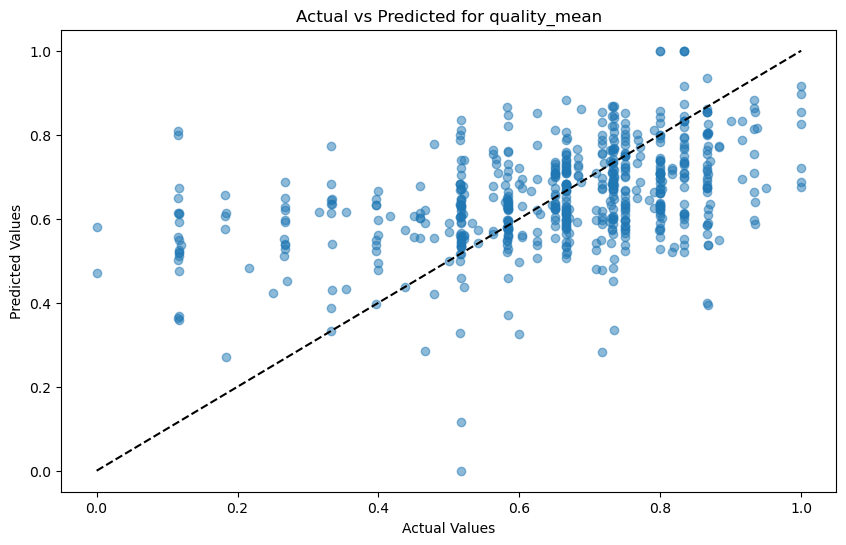

In [97]:
# Train the model
model, predictions = train_linear_model(X_train, y_train, X_test)

# Evaluate the model with MSE
mse = mean_squared_error(y_test, predictions)
print(f"MSE for {y_quality.name} with {train_linear_model.__name__}: {mse}")

# Calculate and print Pearson correlation
correlation, _ = pearsonr(y_test, predictions)
print(f"Pearson Correlation for {y_quality.name} with {train_linear_model.__name__}: {correlation}")

# Plot actual vs predicted values
plot_predictions(y_test, predictions, f"Actual vs Predicted for {y_quality.name}")

MSE for quality_mean with train_ridge_model: 0.028570099321556762
Pearson Correlation for quality_mean with train_ridge_model: 0.4600100465885813


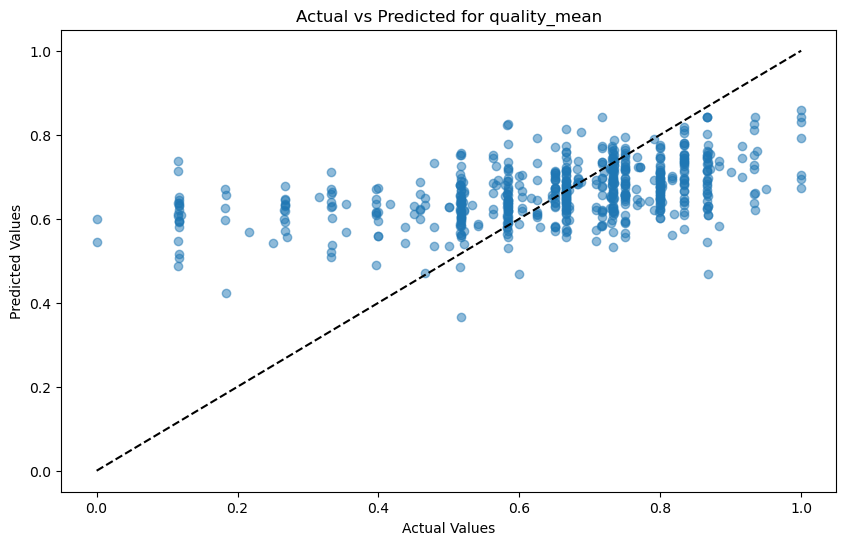

In [98]:
# Train the model
model, predictions = train_ridge_model(X_train, y_train, X_test)

# Evaluate the model with MSE
mse = mean_squared_error(y_test, predictions)
print(f"MSE for {y_quality.name} with {train_ridge_model.__name__}: {mse}")

# Calculate and print Pearson correlation
correlation, _ = pearsonr(y_test, predictions)
print(f"Pearson Correlation for {y_quality.name} with {train_ridge_model.__name__}: {correlation}")

# Plot actual vs predicted values
plot_predictions(y_test, predictions, f"Actual vs Predicted for {y_quality.name}")

In [99]:
# Get feature importances based on model type
importances = get_linear_feature_importances(model)

sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
print(f"Top 10 influential features for {y_quality.name}: {sorted_importances[:10]}")

Top 10 influential features for quality_mean: [('climate', 0.19715566800048312), ('earth', 0.161760993701179), ('ªª', 0.14942852591250216), ('mangelernährung', 0.14908915411218684), ('калория', 0.14625113125554123), ('bir', 0.14594685448681832), ('الطاقة', 0.14090615499599599), ('mmr', 0.13012255544763268), ('site', 0.1294497842681721), ('twitter', 0.1291019283266579)]


MSE for quality_mean with train_random_forest_model: 0.030002005532754263
Pearson Correlation for quality_mean with train_random_forest_model: 0.41240388261207306


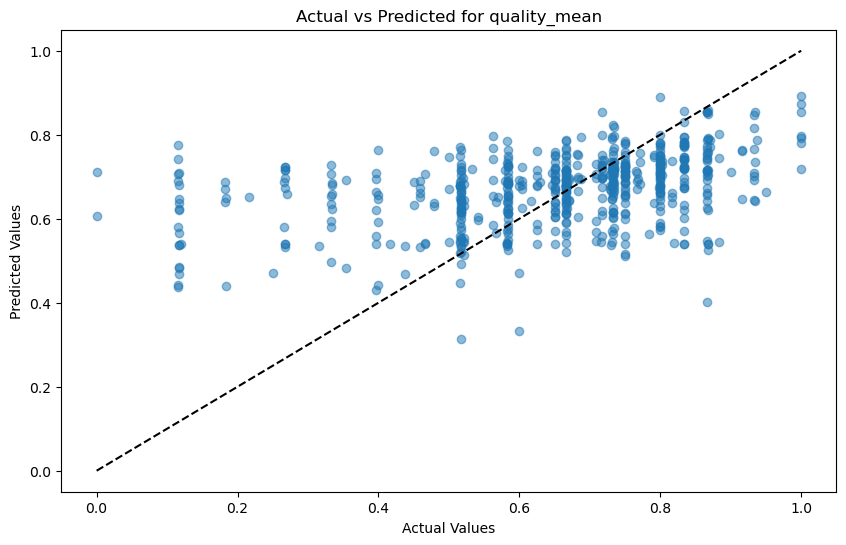

In [57]:
# Train the model
model, predictions = train_random_forest_model(X_train, y_train, X_test)

# Evaluate the model with MSE
mse = mean_squared_error(y_test, predictions)
print(f"MSE for {y_quality.name} with {train_random_forest_model.__name__}: {mse}")

# Calculate and print Pearson correlation   
correlation, _ = pearsonr(y_test, predictions)
print(f"Pearson Correlation for {y_quality.name} with {train_random_forest_model.__name__}: {correlation}")

# Plot actual vs predicted values
plot_predictions(y_test, predictions, f"Actual vs Predicted for {y_quality.name}")

In [109]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)  # Fit to the entire dataset to define the vocabulary

TfidfVectorizer()

In [116]:
def bootstrap_ridge_regression_with_coefs(X, y, X_test, y_test, n_iterations=1000, alpha=1.0):
    mse_scores = []
    r2_scores = []
    correlations = []
    coefficient_list = []  # List to store coefficients for each iteration

    for i in tqdm(range(n_iterations)):
        # Resample the training data with replacement
        X_train_resampled, y_train_resampled = resample(X, y)
        
        # Train the model on the resampled data
        model, predictions = train_ridge_model(X_train_resampled, y_train_resampled, X_test, vectorizer, alpha=alpha)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        correlation, _ = pearsonr(y_test, predictions)
        
        # Store the scores and coefficients
        mse_scores.append(mse)
        r2_scores.append(r2)
        correlations.append(correlation)
        coefficient_list.append(model.coef_)  # Assuming 'ridge' is the name of the Ridge step in your pipeline

    # Process coefficient statistics
    coefficients = np.mean(np.array(coefficient_list), axis=0)  # Average coefficients across all iterations
    feature_names = vectorizer.get_feature_names_out()  # Get feature names from the TF-IDF vectorizer

    return mse_scores, r2_scores, correlations, coefficients, feature_names

In [118]:
mse_scores, r2_scores, correlations, coefficients, feature_names = bootstrap_ridge_regression_with_coefs(
    X_train, y_train, X_test, y_test, n_iterations=100, alpha=1.0)

# Sort features by the absolute value of their coefficients
sorted_features = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print top 10 influential features
print("Top 10 influential features:")
for feature, coef in sorted_features[:20]:
    print(f"{feature}: {coef}")

100%|██████████| 100/100 [05:33<00:00,  3.33s/it]

Top 10 influential features:
meaning: -0.2600512592603767
school: 0.23907912342351165
discussed: 0.2043362653700064
recent: 0.19565015692055301
accessibility: 0.17840417602816516
number: -0.17688193943427996
understand: 0.17312434821966668
previous: -0.15450933410445855
references: 0.15226217181204504
major: 0.1514339617699392
please: -0.13363946093318974
hl: -0.12805488631101672
author: 0.12556038093270763
scientific: 0.1242466308721607
comments: 0.12259903504385397
apply: -0.12146240832790883
terms: 0.11683807895222671
everyday: -0.1165288739114552
text: -0.1140152803554839
mark: 0.11039544009306607


# Ridge regression with deviding the data to languages

In [132]:
def bootstrap_ridge(X, y, n_iterations=1000, alpha=1.0):
    coefs = []
    for _ in tqdm(range(n_iterations)):
        X_resampled, y_resampled = resample(X, y)
        model = Ridge(alpha=alpha)
        model.fit(X_resampled, y_resampled)
        coefs.append(model.coef_)
    return np.array(coefs)

In [133]:
new_X = X.dropna(subset=['quality_mean', 'accessibility_mean'])

In [134]:
results = {}

for lang in cleaned_array:
    print(f"Processing language: {lang}")
    language_data = new_X[new_X['langs'] == lang]
    X_lang = language_data['cleaned_text']
    y_lang = language_data['quality_mean'] # Assuming you have a target column

    # Split and vectorize the data
    X_train_lang, X_test_lang, y_train_lang, y_test_lang = train_test_split(X_lang, y_lang, test_size=0.3, random_state=42)
    vectorizer_lang = TfidfVectorizer()
    X_train_lang_tfidf = vectorizer_lang.fit_transform(X_train_lang)

    # Apply bootstrap to get coefficients
    coefs = bootstrap_ridge(X_train_lang_tfidf, y_train_lang, n_iterations=1000, alpha=1.0)
    
    # Store results including mean and confidence intervals of coefficients
    mean_coefs = np.mean(coefs, axis=0)
    ci_lower = np.percentile(coefs, 2.5, axis=0)
    ci_upper = np.percentile(coefs, 97.5, axis=0)

    results[lang] = {
        'mean_coefs': mean_coefs,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'vectorizer': vectorizer_lang
    }

Processing language: Zulu


100%|██████████| 1000/1000 [00:01<00:00, 720.31it/s]


Processing language: Portuguese


100%|██████████| 1000/1000 [00:02<00:00, 404.65it/s]


Processing language: Hindi


100%|██████████| 1000/1000 [00:01<00:00, 632.37it/s]


Processing language: Spanish


100%|██████████| 1000/1000 [00:02<00:00, 438.08it/s]


Processing language: Taiwanese


100%|██████████| 1000/1000 [00:01<00:00, 988.57it/s]


Processing language: Japanese


100%|██████████| 1000/1000 [00:01<00:00, 884.65it/s]


Processing language: Indonesian


100%|██████████| 1000/1000 [00:01<00:00, 704.00it/s]


Processing language: Afrikaans


100%|██████████| 1000/1000 [00:01<00:00, 648.04it/s]


Processing language: English


100%|██████████| 1000/1000 [00:02<00:00, 424.01it/s]


Processing language: Hebrew


100%|██████████| 1000/1000 [00:02<00:00, 427.84it/s]


Processing language: Korean


100%|██████████| 1000/1000 [00:01<00:00, 500.59it/s]


Processing language: Vietnamese


100%|██████████| 1000/1000 [00:01<00:00, 648.30it/s]


Processing language: Swahili


100%|██████████| 1000/1000 [00:02<00:00, 361.32it/s]


Processing language: French


100%|██████████| 1000/1000 [00:02<00:00, 364.04it/s]


Processing language: Arabic


100%|██████████| 1000/1000 [00:02<00:00, 434.18it/s]


Processing language: Chinese


100%|██████████| 1000/1000 [00:01<00:00, 927.64it/s]


Processing language: Ukrainian


100%|██████████| 1000/1000 [00:01<00:00, 512.58it/s]


Processing language: Italian


100%|██████████| 1000/1000 [00:02<00:00, 361.92it/s]


Processing language: Russian


100%|██████████| 1000/1000 [00:02<00:00, 369.78it/s]


Processing language: Turkish


100%|██████████| 1000/1000 [00:02<00:00, 390.51it/s]


Processing language: German


100%|██████████| 1000/1000 [00:02<00:00, 462.33it/s]


In [135]:
for lang, data in results.items():
    feature_names = data['vectorizer'].get_feature_names_out()
    sorted_indices = np.argsort(-np.abs(data['mean_coefs']))  # Sort by importance
    top_features = sorted_indices[:10]  # Choose top 10 features to display
    print(f"Language: {lang}")
    print("Top Feature Importances:")
    for idx in top_features:
        feature = feature_names[idx]
        coef = data['mean_coefs'][idx]
        ci_low = data['ci_lower'][idx]
        ci_high = data['ci_upper'][idx]
        print(f"{feature}: {coef:.4f} (95% CI: [{ci_low:.4f}, {ci_high:.4f}])")

Language: Zulu
Top Feature Importances:
zuhilovedcom: -0.1138 (95% CI: [-0.2414, 0.0000])
futhi: 0.1018 (95% CI: [0.0643, 0.1387])
izinkanyezi: 0.0985 (95% CI: [0.0052, 0.1504])
kakhulu: 0.0935 (95% CI: [0.0601, 0.1231])
enthusiasm: -0.0861 (95% CI: [-0.1874, 0.0000])
weight: -0.0850 (95% CI: [-0.1811, 0.0000])
2024: -0.0817 (95% CI: [-0.1628, 0.0010])
ukukhanya: 0.0668 (95% CI: [0.0100, 0.1018])
change: -0.0583 (95% CI: [-0.1426, 0.0086])
ukuthi: 0.0576 (95% CI: [0.0127, 0.0962])
Language: Portuguese
Top Feature Importances:
frete: -0.1575 (95% CI: [-0.3045, 0.0036])
senha: -0.1381 (95% CI: [-0.2818, 0.0000])
esqueci: -0.1381 (95% CI: [-0.2818, 0.0000])
grátis: -0.1191 (95% CI: [-0.2520, 0.0103])
vacinas: 0.0584 (95% CI: [0.0232, 0.0839])
peso: 0.0520 (95% CI: [-0.0068, 0.1146])
esposende: -0.0477 (95% CI: [-0.0982, 0.0000])
pcr: 0.0448 (95% CI: [-0.0040, 0.1016])
agendamento: -0.0425 (95% CI: [-0.0928, 0.0000])
vacina: 0.0390 (95% CI: [0.0160, 0.0634])
Language: Hindi
Top Feature Imp